In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dataset=pd.read_csv('diabetes.csv')

In [2]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


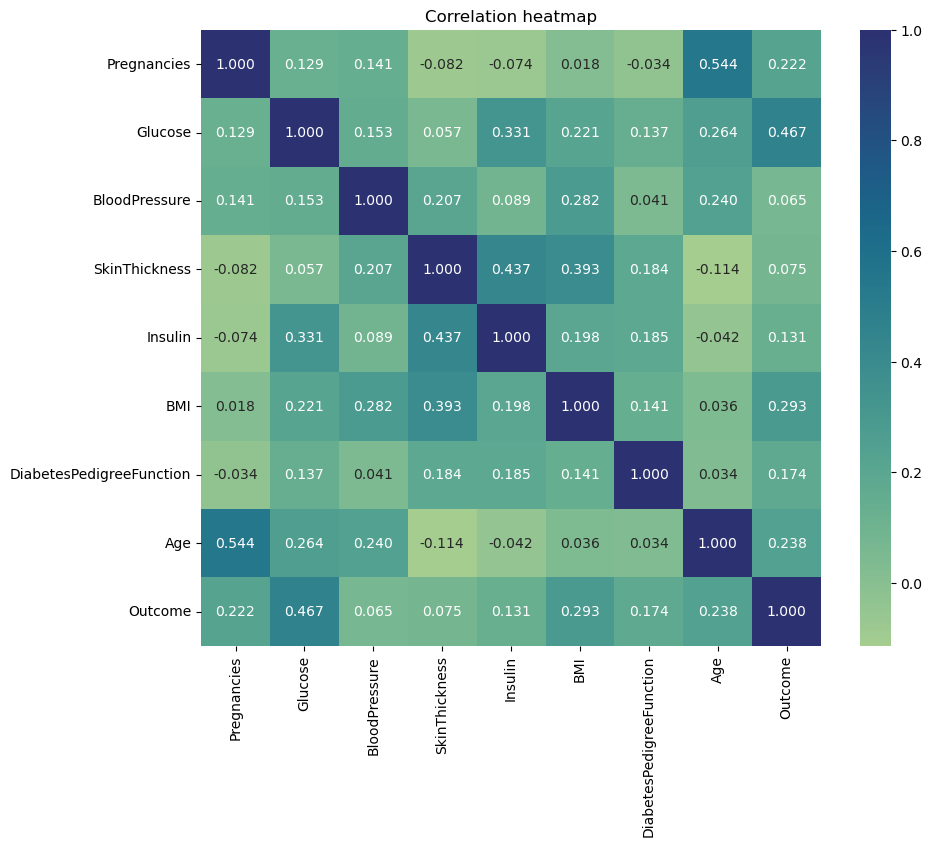

In [5]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(dataset.corr(), annot=True, fmt=".3f", cmap="crest")
plt.title('Correlation heatmap')
plt.show()


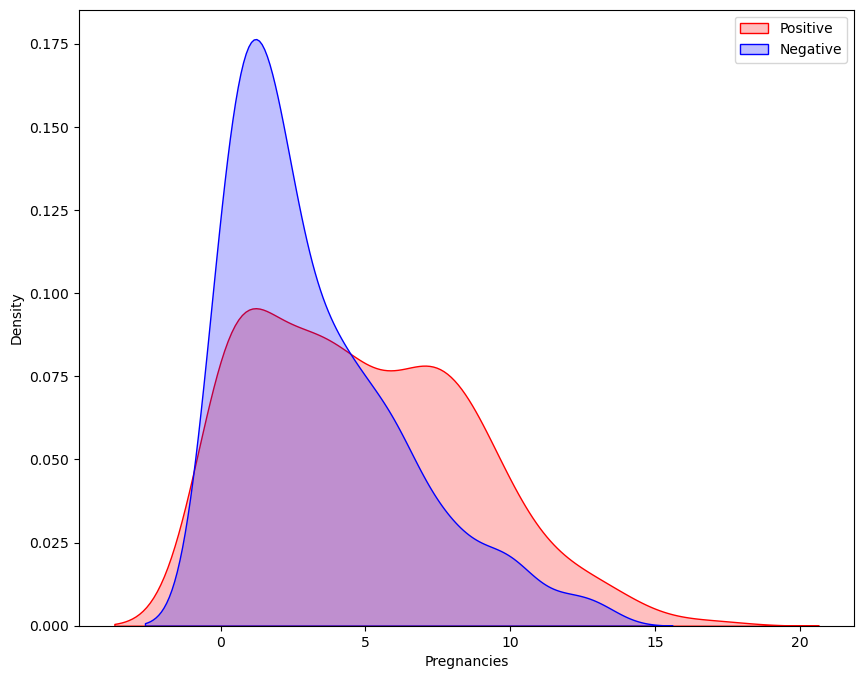

In [6]:
#Exploring pregnency and target variables
plt.figure(figsize=(10,8))
#Plotting Density function graph of the pregnancies and target variables
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

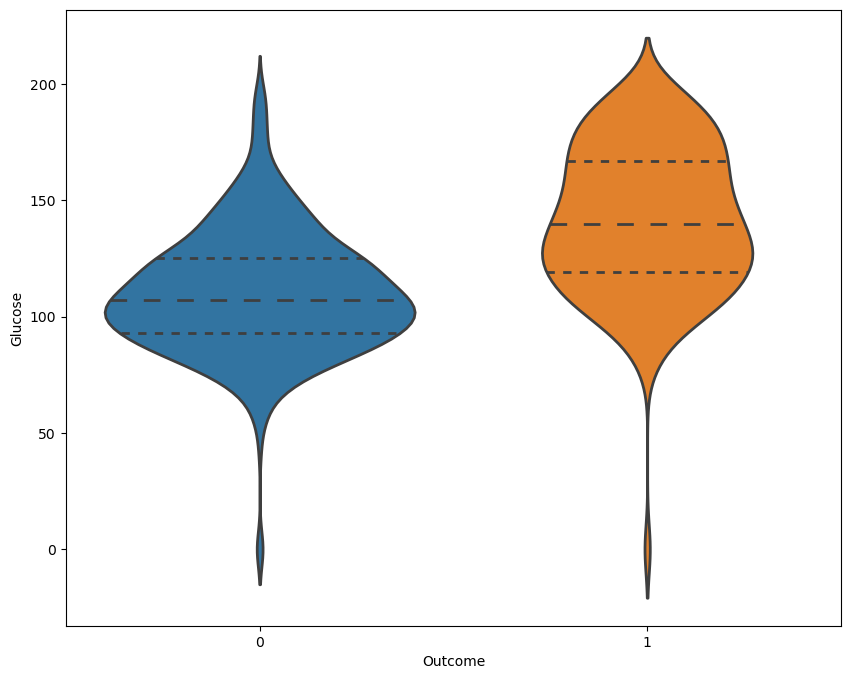

In [7]:
#Exploring Glucose and target variables
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x="Outcome",y="Glucose",split=True,linewidth=2,inner='quart')

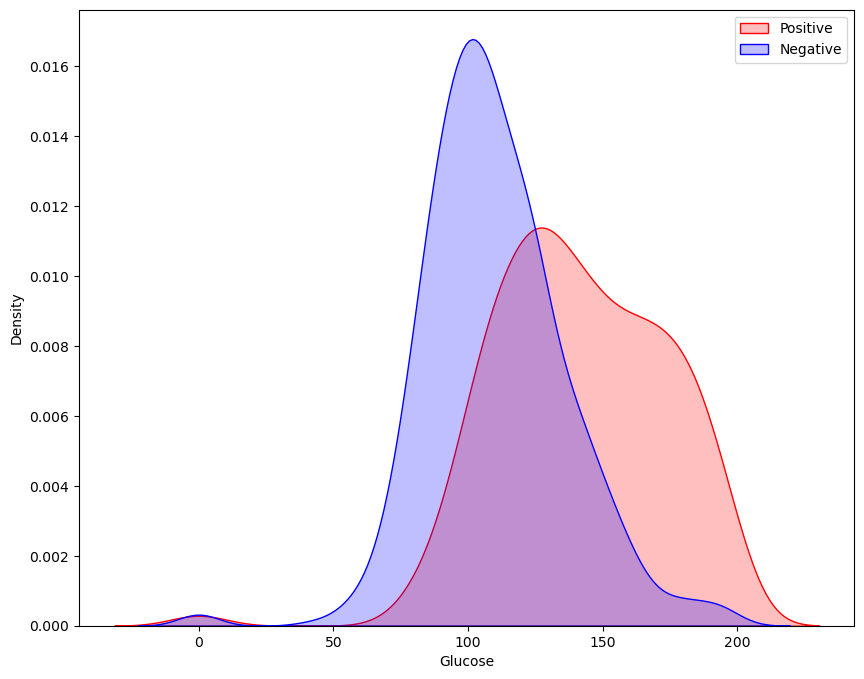

In [8]:
#Exploring pregnency and target variables
plt.figure(figsize=(10,8))
#Plotting Density function graph of the pregnancies and target variables
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==1],color="Red",fill=True)
kde=sns.kdeplot(dataset["Glucose"][dataset["Outcome"]==0],color="Blue",fill=True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

In [9]:
#Replace 0 vlaues with mean or median of the respective features
#Glucose
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].median())
#Blood pressure
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].median())
#BMI
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].median())
#Insulin
dataset['Insulin']=dataset['Insulin'].replace(0,dataset['Insulin'].median())

In [10]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,30.5,30.1,0.349,47,1


In [11]:
#Splitting the dependent and independent features
X=dataset.drop(['Outcome'],axis=1)
y=dataset['Outcome']

In [12]:
#splitting test and train dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

for n_neighbors in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Check accuracy score
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))


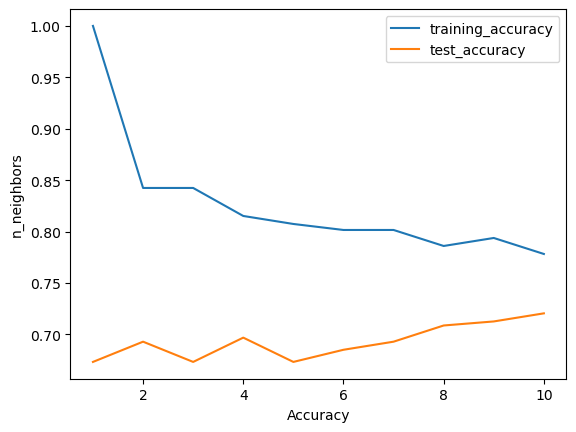

In [15]:
plt.plot(range(1,11),training_accuracy,label="training_accuracy")
plt.plot(range(1,11),test_accuracy,label="test_accuracy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()

In [16]:
#using knn
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train)," : Training accuracy")
print(knn.score(X_test,y_test)," : Test accuracy")

0.7782101167315175  : Training accuracy
0.7204724409448819  : Test accuracy


In [17]:
#using Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42,max_depth=3,criterion='entropy')
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train)," : Training accuracy")
print(dt.score(X_test,y_test)," : Test accuracy")

0.7665369649805448  : Training accuracy
0.7165354330708661  : Test accuracy


In [18]:
#using multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train)," : Training accuracy")
print(mlp.score(X_test,y_test)," : Test accuracy")

0.7684824902723736  : Training accuracy
0.6889763779527559  : Test accuracy


In [19]:
#using Support vector classifier
from sklearn.svm import SVC
svc =SVC(kernel='linear')
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train)," : Training accuracy")
print(svc.score(X_test,y_test)," : Test accuracy")

0.7704280155642024  : Training accuracy
0.7480314960629921  : Test accuracy


In [20]:
#Normalising dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [21]:
#Testing KNN using normalised dataset
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train,y_train)
print(knn.score(X_train_scaled,y_train)," : Training accuracy")
print(knn.score(X_test_scaled,y_test)," : Test accuracy")

0.6459143968871596  : Training accuracy
0.6614173228346457  : Test accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
#Testing Decision Tree using normalised dataset
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42,max_depth=3,criterion='entropy')
dt.fit(X_train,y_train)
print(mlp.score(X_train_scaled,y_train)," : Training accuracy")
print(mlp.score(X_test_scaled,y_test)," : Test accuracy")

0.6459143968871596  : Training accuracy
0.6614173228346457  : Test accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [23]:
#Testing MLP using normalised dataset
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print(mlp.score(X_train_scaled,y_train)," : Training accuracy")
print(mlp.score(X_test_scaled,y_test)," : Test accuracy")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.6459143968871596  : Training accuracy
0.6614173228346457  : Test accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [24]:
#Testing Support vector classifier on normalised dataset
from sklearn.svm import SVC
svc =SVC(kernel='linear')
svc.fit(X_train,y_train)
print(svc.score(X_train_scaled,y_train)," : Training accuracy")
print(svc.score(X_test_scaled,y_test)," : Test accuracy")

0.6459143968871596  : Training accuracy
0.6614173228346457  : Test accuracy


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
